# DS320 Spring 2023: excercise 04

<b> posted on Tue 04/06/23, due date is Tue 03/11/23, at 8:00 AM </b>

# Data visualization with matplotlib

Requirement: use matplotlib, do NOT use other libraries.

There are 5 tasks, each is worth 20 points

Note: (1) you should create the data for each task, do NOT change the origrinal dataframe for tasks

(2) I will mannually grade your code, so no test case will be provided, but I can give you the expectation of the outcomes for each task.


In [86]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from pandas import Series, DataFrame

np.set_printoptions(precision=2, suppress=True, linewidth=120)

pd.options.display.max_rows = 20

plt.rc("figure", figsize=(8, 4))


# Data preparation

Read the data from the provided fortune500.csv into a DataFrame.

Drop "(in millions)" from the names of the columns so that dot-notation can be used to access them.

Set data type of the Company column to a string and data type of the "Profit (in millions)" to a floating-point number.


In [87]:
df_fortune = pd.read_csv("fortune500.csv")

df_fortune.rename({"Revenue (in millions)": "Revenue", "Profit (in millions)": "Profit"},
          axis="columns",
          inplace=True)

df_fortune.Company = df_fortune.Company.astype(pd.StringDtype())
df_fortune.Profit = pd.to_numeric(df_fortune.Profit, errors="coerce")
df_fortune

,Year,Rank,Company,Revenue,Profit
0,1955,1,General Motors,9823.5,806.0
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493.0
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


## Task 1

Plot the historical revenue of three companies, *General Dynamics*, *General Electric*, and *General Motors*.

The figure must have 4 subplots, 3 companies individually and 1 plot with all three companies.

`x`-axis on each plot must be the year and `y`-axis must be the revenue of the company that year. It's easier to achieve if `Year` is an index of the series with a company revenue.

Your figure should look similar (though not necessarily identical) to the following:

![Task 1](task1.png)

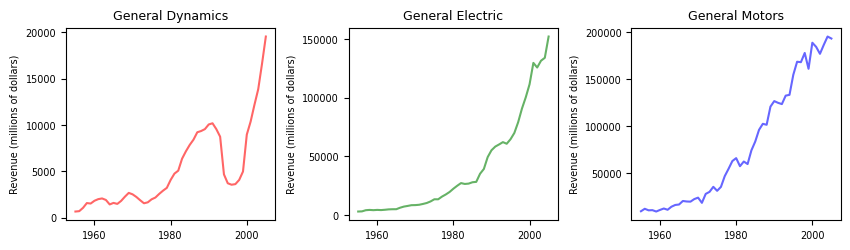

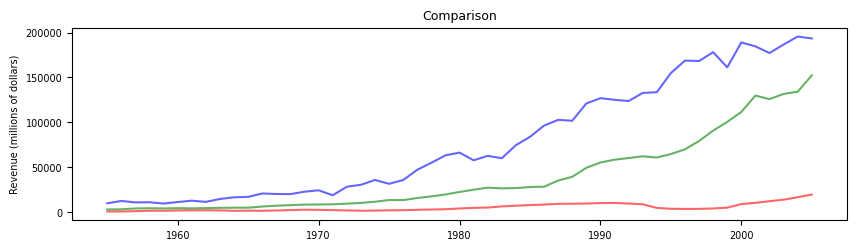

In [88]:
###BEGIN SOLUTION
companies = ['General Dynamics', 'General Electric', 'General Motors']
colors = ['red', 'green', 'blue']
fontsize = 7
fig, ax = plt.subplots(1, 3, figsize = (10,2.5))

for i in range(3):
    x = df_fortune[df_fortune['Company'] == companies[i]]['Year']
    y = df_fortune[df_fortune['Company'] == companies[i]]['Revenue']
    ax[i].plot(x,y, color = colors[i], alpha = 0.6)
    
    ax[i].set_ylabel('Revenue (millions of dollars)', fontsize = fontsize)
    ax[i].set_title(companies[i], fontsize = fontsize + 2)

    for tick in ax[i].xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize) 
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize) 

fig.subplots_adjust(wspace=0.35, hspace=0)


fig1 = plt.figure(figsize = (10,2.5))
ax1 = fig1.add_subplot()

for i in range(3):
    x = df_fortune[df_fortune['Company'] == companies[i]]['Year']
    y = df_fortune[df_fortune['Company'] == companies[i]]['Revenue']
    ax1.plot(x,y, color = colors[i], alpha = 0.6)

ax1.set_ylabel('Revenue (millions of dollars)', fontsize = fontsize)
ax1.set_title('Comparison', fontsize = fontsize + 2)

for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize) 

###END SOLUTION

## Task 2

Plot the total profits of *Hershey Foods* by decade as a bar chart.

A decade is ten years that share the first 3 digits, so the figure must include 6 decades: 1950s, 1960s, 1970s, 1980s, 1990s, and 2000s.

Your figure should look similar (though not necessarily identical) to the following:

![Task 2](task2.png)

In [89]:
###BEGIN SOLUTION
def getDecade(year):
    return int(year/10) * 10
###END SOLUTION

/tmp/ipykernel_2017360/3530742411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['decade'] = data.Year.apply(getDecade)


[Text(1, 0, '1950s'),
 Text(2, 0, '1960s'),
 Text(3, 0, '1970s'),
 Text(4, 0, '1980s'),
 Text(5, 0, '1990s'),
 Text(6, 0, '2000s')]

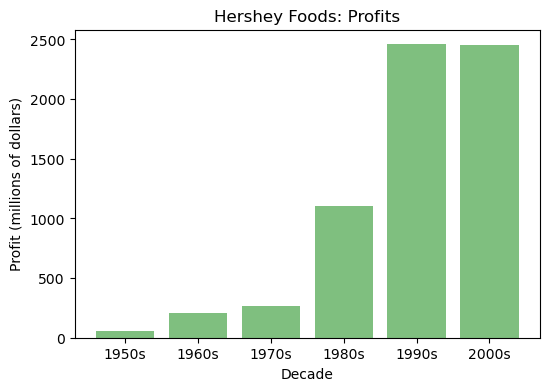

In [90]:
###BEGIN SOLUTION
data = df_fortune[df_fortune['Company'] == 'Hershey Foods']
data['decade'] = data.Year.apply(getDecade)
data = data.groupby('decade').agg({'Profit': 'sum'})
data = data.reset_index()
data = data.sort_values('decade', ascending = True)

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()

ax.bar(x = range(1, data.shape[0] + 1, 1), height = data.Profit, color="green", alpha = 0.5);

ax.set_title("Hershey Foods: Profits")
ax.set_xlabel("Decade")
ax.set_ylabel("Profit (millions of dollars)")

ax.set_xticks(range(1, data.shape[0] + 1, 1))
ax.set_xticklabels(data.decade.apply(lambda x: str(x) + "s"))

###END SOLUTION

## Task 3

Plot the revenue and rank of *Microsoft* as a scatterplot.

Revenue must be the `x`-axis, rank must be the inverted `y`-axis.

Visit this link for inverting axes https://www.geeksforgeeks.org/how-to-reverse-axes-in-matplotlib/

Your figure should look similar (though not necessarily identical) to the following:

![Task 3](task3.png)


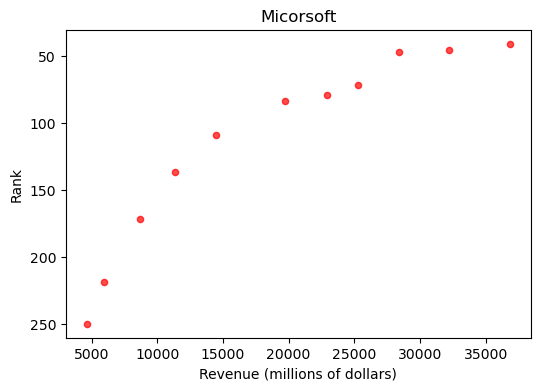

In [91]:
###BEGIN SOLUTION
data = df_fortune[df_fortune['Company'] == 'Microsoft']

fig, ax = plt.subplots(figsize = (6,4))

ax.scatter(x = data['Revenue'], y = data['Rank'] , s=20, c='red', alpha=0.7)
ax.set_title("Micorsoft")
ax.set_xlabel("Revenue (millions of dollars)")
ax.set_ylabel("Rank")
ax.invert_yaxis()

###END SOLUTION

## Task 4

Plot IBM's (*Intl. Business Machines*) annual rank between 1965 and 2005, annotating the following dates:

- 1970: "Relational DB"
- 1981: "IBM PC"
- 1997: "Deep Blue"

The `y`-axis should be inverted and limited to `[0..15]` to make changes in ranking more visible.

Visit this link for nice annotations https://stackoverflow.com/questions/24108063/matplotlib-two-different-colors-in-the-same-annotate

Your figure should look similar (though not necessarily identical) to the following:

![Task 4](task4.png)

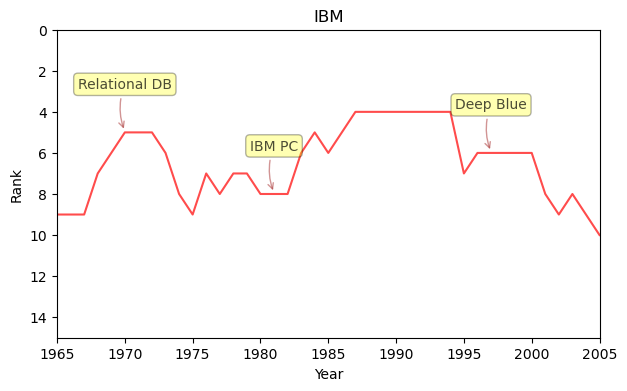

In [126]:
###BEGIN SOLUTION
data = df_fortune[df_fortune['Company'] == 'Intl. Business Machines']

fig, ax = plt.subplots(figsize = (7,4))

ax.plot(data['Year'], data['Rank'], color='red', alpha=0.7)
ax.set_title("IBM")
ax.set_xlabel("Year")
ax.set_ylabel("Rank")
ax.set_ylim([0, 15])
ax.set_xlim([1965, 2005])
ax.invert_yaxis()

annos_text = ['Relational DB', 'IBM PC', 'Deep Blue']
annos_x = [1970, 1981, 1997]
annos_y = []
for y in annos_x:
    annos_y.append(data[data.Year == y].Rank.values[0])


for i in range(len(annos_x)):
    ax.annotate(text = annos_text[i],            
                xy=(annos_x[i], annos_y[i] - 0.05),
                xytext=(annos_x[i], annos_y[i] - 2),
                
                ha='center', va='bottom',color='black', alpha = 0.7,
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', 
                color='brown', alpha = 0.5))

###END SOLUTION

## Task 5

Plot Apple's (*Apple Computers*) annual profit and mark Steve Jobs's absence (1985-1997) as a red zone (rectangle).

Visit this link to get xlim (same for ylim) https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.get_xlim.html

Add text https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

Your figure should look similar (though not necessarily identical) to the following:

![Task 5](task5.png)

       Year  Rank         Company  Revenue  Profit
14410  1983   411  Apple Computer    583.1    61.3
14798  1984   299  Apple Computer    982.8    76.7
15233  1985   234  Apple Computer   1515.9    64.1
15690  1986   191  Apple Computer   1918.3    61.2
16189  1987   190  Apple Computer   1901.9   154.0


Text(1987, -636.55, "Steve Jobs's absence")

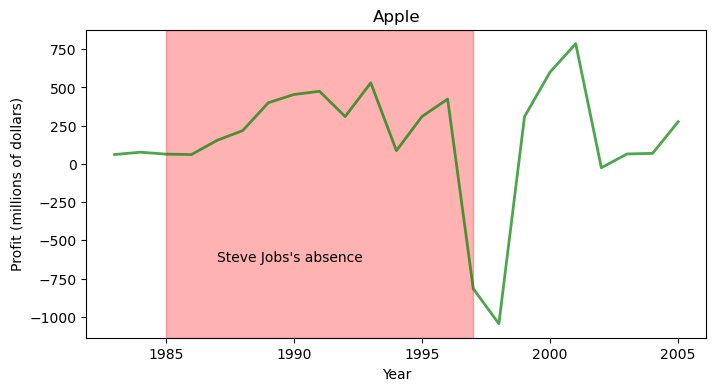

In [151]:
###BEGIN SOLUTION
data = df_fortune[df_fortune['Company'] == "Apple Computer"]

print(data.head())
fig, ax = plt.subplots(figsize = (8,4))

ax.plot(data['Year'], data['Profit'], color='green', alpha=0.7, linewidth = 2)
ax.set_title("Apple")
ax.set_xlabel("Year")
ax.set_ylabel("Profit (millions of dollars)")
#ax.set_ylim([0, 15])
#ax.set_xlim([1965, 2005])
#ax.invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
rect = plt.Rectangle((1985, ylim[0]), 1997-1985, ylim[1] - ylim[0], color="red", alpha=0.3)

ax.add_patch(rect)

ax.text(1985 + 2, ylim[0] + 500, "Steve Jobs's absence")

###END SOLUTION